## 1 공공데이터 상권정보 분석
### 1.1 파일로드 및 라이브러리 임포트
https://www.data.go.kr/data/15069540/fileData.do

* numpy: 수치계산, 행렬이나 대규모 다차원 배열 처리
* seaborn: 데이터 시각화
* matplotlib.pyplot: 데이터 시각화

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

### 1.2 시각화를 위한 폰트 설정

In [3]:
import matplotlib.pyplot as plt
# ser font for Window
plt.rc('font',family='Malgun Gothic')
# ser font for Mac
# plt.rc('font',family='AppleGothic')
# plt.rc('axes',unicode_minus=False)  # 마이너스 폰트 깨짐 방지

# 그래프가 노트북 안에 보이게 하기위해
%matplotlib inline

In [4]:
from matplotlib_inline.backend_inline import set_matplotlib_formats
# 폰트 선명도 증가
set_matplotlib_formats('retina')

### 1.3 데이터 로드
* read_csv 사용하여 파일로드
* df 변수에 담기
* shape: 데이터 개수 확인

In [5]:
from glob import glob
file_name = glob('data/store/*.csv')[0]
file_name

'data/store\\소상공인시장진흥공단_상가업소정보_의료기관_201909.csv'

In [6]:
df = pd.read_csv(file_name, low_memory=False, encoding="ms949")
df.shape

(91335, 39)

### 1.4 데이터 미리보기
* head(), tail(), sample() 등이 있음
* shift + tap => docstring

In [7]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4.130000e+24,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [8]:
df.tail(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2.640000e+24,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2.0,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1.170000e+24,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4.410000e+24,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


### 1.5 데이터 요약하기
#### 1.5.1 요약정보

In [9]:
# info로 요약확인
# 컬럼 번호 / 컬럼 이름 / 해당 컬럼의 데이터 개수 / 데이터 타입
# int64 정수 / object 문자열 / float64 실수
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

In [10]:
# 컬럼명만 출력
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [11]:
# 데이터 타입
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

### 1.6 결측치
* null 확인

In [12]:
df.isnull()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False
91331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
91332,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
91333,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False


In [14]:
True == 1

True

In [15]:
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47346
호정보          75898
경도               0
위도               0
dtype: int64

<Axes: >

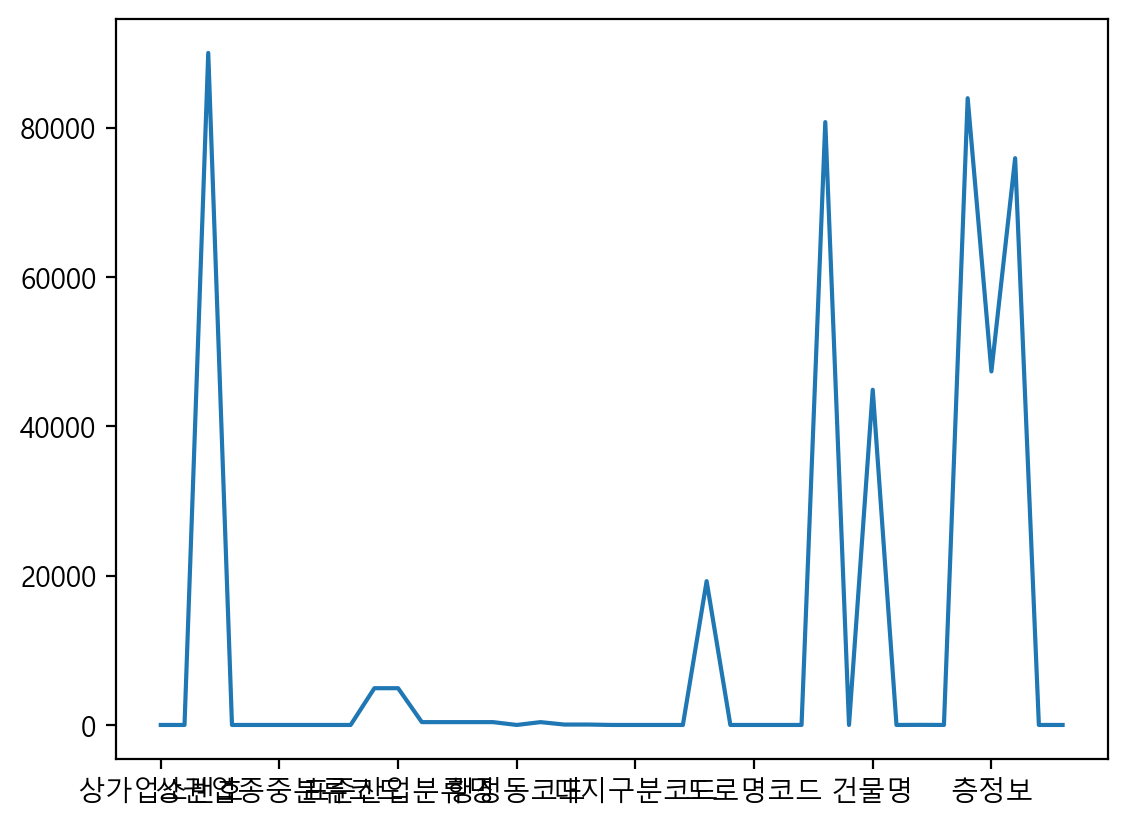

In [18]:
# null_count.plot.line() 기본값
null_count.plot()

<Axes: >

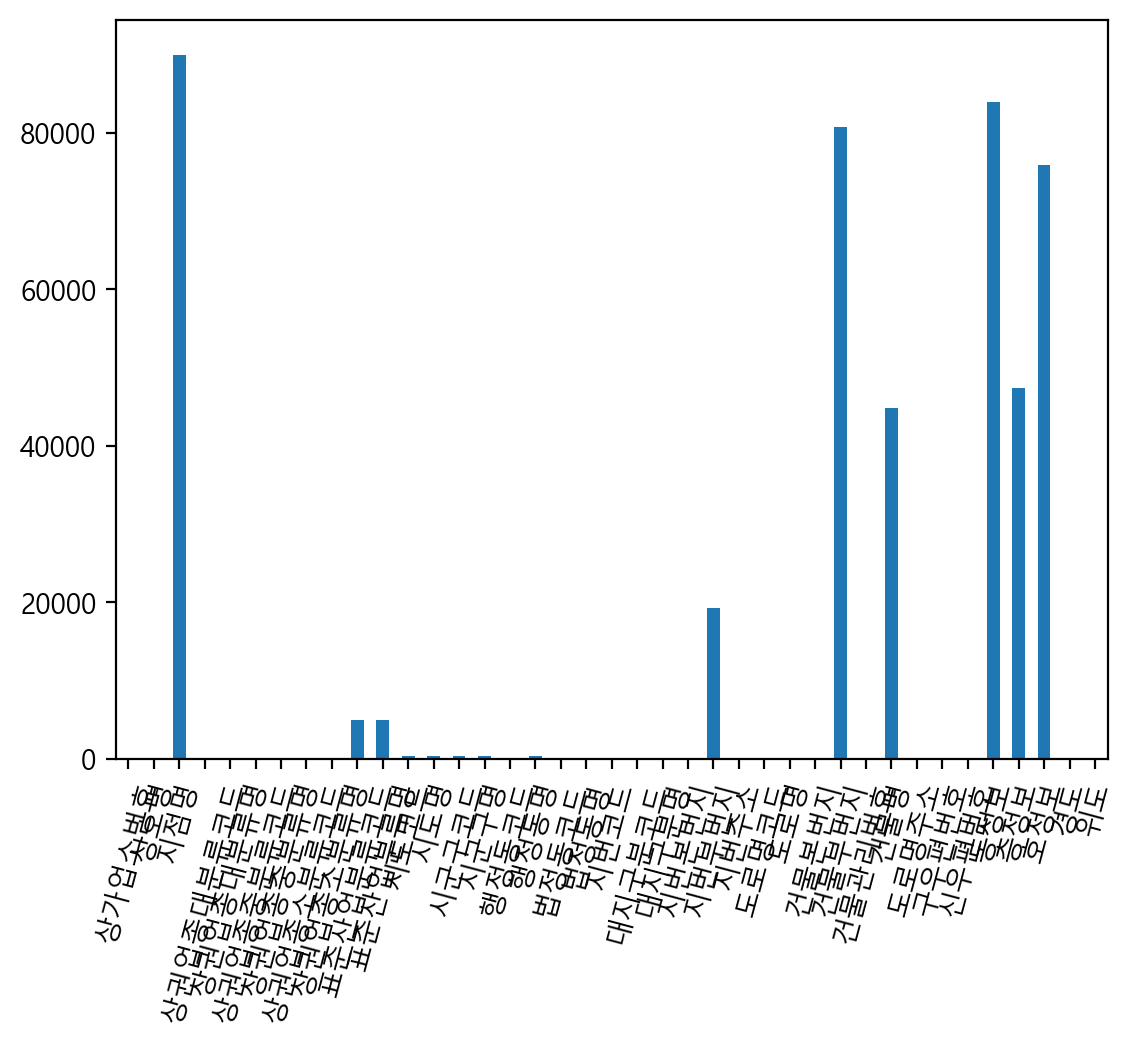

In [22]:
# 컬럼명 돌리기
null_count.plot.bar(rot= 75)

<Axes: >

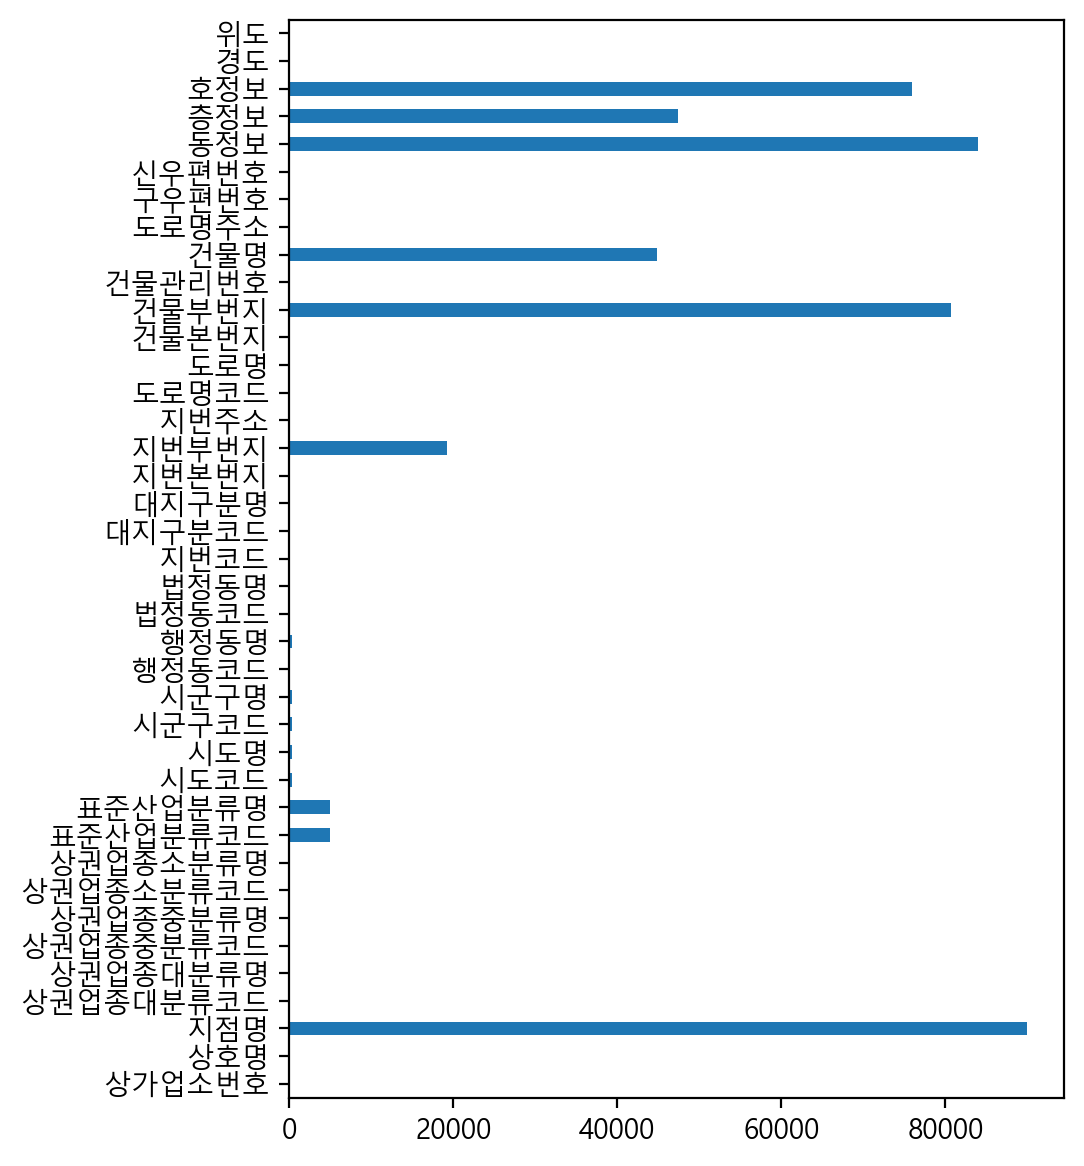

In [27]:
## figsize=(x ,y)
null_count.plot.barh(figsize=(5 ,7))

In [31]:
# 현재 null_count 1차원 배열
# reset_index() => Data Frame 변환
df_null_count = null_count.reset_index()
df_null_count

In [33]:
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


### 1.7 컬럼명 변경


In [37]:
df_null_count.columns = ['Column Name', 'Null count']
df_null_count.head()

,Column Name,Null count
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


### 1.8 정렬하기

In [41]:
# sort_values: 값 기준 정렬
# sort_index: 인덱스 기준 정렬
# 필수 인자 by: 컬럼명 || 인덱스
# 옵션 중 ascending: 기본값 True
# head(): 기본값 head(5)
df_null_count.sort_values(by="Null count", ascending=False).head()

,Column Name,Null count
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75898
35,층정보,47346


결측지를 제거하여 분석결과에 정확성을 높힐수도 있다

In [ ]:
1.9 부터 수업 진행